#1. Integrate and Fire

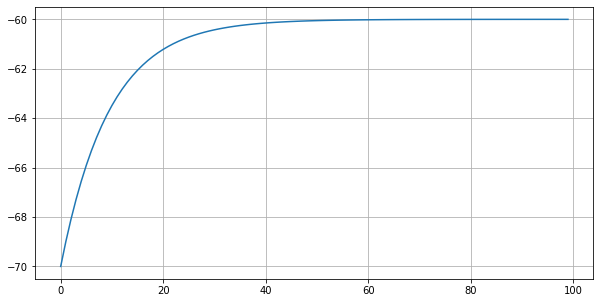

In [1]:
#1.1 Simulate the dynamics of the membrane potential 
import matplotlib.pyplot as plt 
import numpy as np 


#function that returns the next step in Eulers method
def euler_stepper(V_0=-70,dt=1,C=1,gL=0.1,EL=-70,I=1,T=100):
    
    #initialize V_values array 
    V_values = np.zeros(int(T/dt)); V_values[0]=V_0 
    
    #Euler Steppin! 
    for i in range(1,int(T/dt)):
        V_values[i] = V_values[i-1]+((gL*(EL-V_values[i-1])+I)/C)*dt
        
    return V_values


#run simulation for given initial conditions 
V_values = euler_stepper() 

#plot 
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(V_values) 

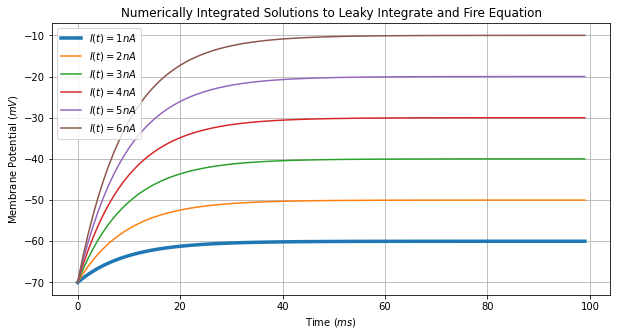

In [2]:
#1.2 Manipulate Current 
plt.figure(figsize=(10,5))

for I_val in np.linspace(1,6,6): 
    if I_val == 1:
        plt.plot(euler_stepper(I=I_val),label="$I(t)="+str(int(I_val))+"nA$",linewidth=3.5)
    else: 
        plt.plot(euler_stepper(I=I_val),label="$I(t)="+str(int(I_val))+"nA$")
    
plt.legend()
plt.grid()
plt.xlabel("Time ($ms$)")
plt.ylabel("Membrane Potential ($mV$)")
plt.title("Numerically Integrated Solutions to Leaky Integrate and Fire Equation")
plt.savefig("Figures/vary_I.png")
plt.show()

In [3]:
#1.3 Solve the ODE 
    # TO DO 
    # maybe try sympy? 

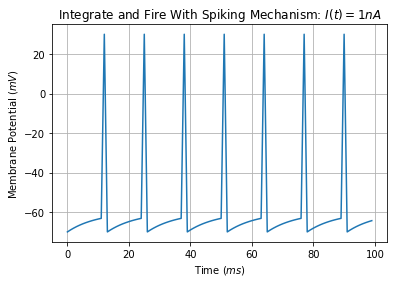

In [4]:
#1.4 Add a spiking mechanism 

#function that impliments spiking mechnaism 
def spiking_euler_stepper(V_0=-70,dt=1,V_threshold = -63, V_max=30,
                          C=1,gL=0.1,EL=-70,I=1,T=100):
    
    #initialize V_values array 
    V_values = np.zeros(int(T/dt)); V_values[0]=V_0 
    
    #Euler Steppin! 
    for i in range(1,int(T/dt)):
        
        #reset if you just spiked
        if V_values[i-1] == V_max: 
            V_values[i] = EL
        
        #else integrate as usual....
        else:
            V_values[i] = V_values[i-1]+((gL*(EL-V_values[i-1])+I)/C)*dt
            
            # but spike if you get too big!!
            if V_values[i] > V_threshold: 
                V_values[i] = V_max 
        
    return V_values

#run simulation for given initial conditions 
V_values = spiking_euler_stepper() 

#plot 
plt.xlabel("Time ($ms$)"); plt.ylabel("Membrane Potential ($mV$)"); plt.title("Integrate and Fire With Spiking Mechanism: $I(t)= 1nA$")
plt.grid()
plt.plot(V_values) 
plt.savefig("Figures/one_with_spike.png")

In [5]:
#1.5 

# Input current values to check 
I_start = 0 ;I_fin = 10 ;num = int(1e5); V_max = 30

#spike count array: 
spike_count = np.zeros(num)

for i,I_val in enumerate(np.linspace(I_start,I_fin,num)): 
    spike_count[i] = np.count_nonzero(spiking_euler_stepper(I=I_val) == V_max) 
    
#find non-zero inidices  
non_zero_spiking = np.nonzero(spike_count) 

#first non-zero 
print(np.linspace(I_start,I_fin,num)[non_zero_spiking[0][0]]) 

0.7001070010700108


In [6]:
#1.5 cont 
#Bisection Method To Find I 
I_right = 10 #initial guess 
I_left = 0 
while abs(I_right-I_left) > 1e-8: 
    
    guess = (I_right+I_left)/2
    spikes = np.count_nonzero(spiking_euler_stepper(I=guess)==V_max) 
    
    if spikes != 0: 
        I_right = (I_right+I_left)/2 
    else: 
        I_left = (I_right+I_left)/2 
    
    
print(I_right,I_left) 

#ans seems to be 0.7 
##TODO Part2 -- Plot Tuning Curve 
print(spike_count)

0.7000206597149372 0.7000206504017115
[ 0.  0.  0. ... 50. 50. 50.]


[ 0.  0.  0. ... 50. 50. 50.]


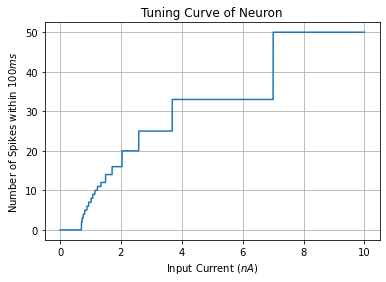

In [7]:
#1.5 cont 
##TODO Part2 -- Plot Tuning Curve 
print(spike_count)
plt.plot(np.linspace(I_start,I_fin,num),spike_count)
plt.xlabel("Input Current ($nA$)")
plt.ylabel("Number of Spikes within $100ms$")
plt.title("Tuning Curve of Neuron")
plt.grid()
plt.savefig("Figures/tuning_curve.png")

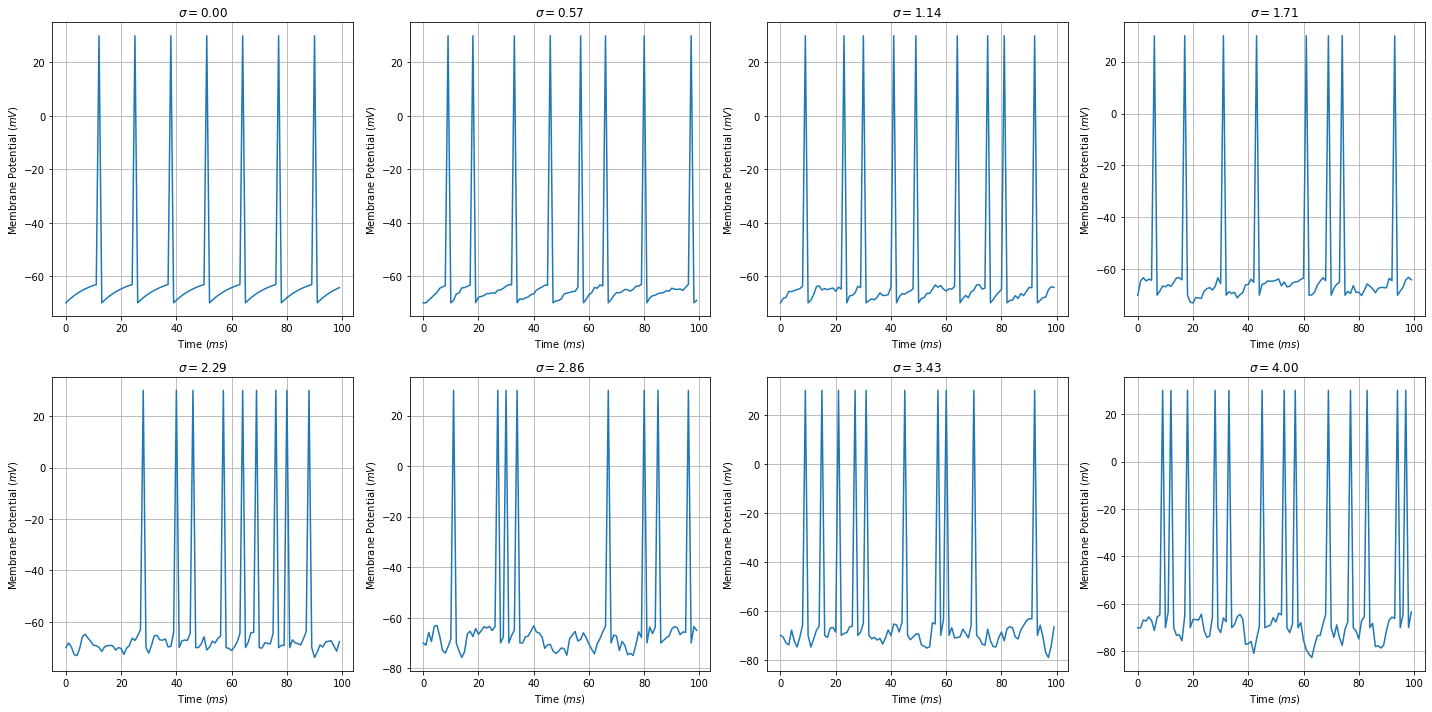

In [8]:
#1.6 Noise and Spike Trains 

#create a function for the spiking with noise 
def spiking_with_noise(V_0=-70,dt=1,V_threshold = -63, V_max=30,
                          C=1,gL=0.1,EL=-70,I=1,T=100,sigma=0.5): 
    
    #initialize V_values array 
    V_values = np.zeros(int(T/dt)); V_values[0]=V_0 
    
    #Euler Steppin! 
    for i in range(1,int(T/dt)):
        
        #reset if you just spiked
        if V_values[i-1] == V_max: 
            V_values[i] = EL
        
        #else integrate as usual....
        else:
            dV =  (gL*(EL-V_values[i-1])+I)/C
            noise = sigma*np.sqrt(dt)*np.random.normal(0,1) 
            V_values[i] = V_values[i-1]+dV*dt +noise
            
            # but spike if you get too big!!
            if V_values[i] > V_threshold: 
                V_values[i] = V_max 
        
    return V_values

def plot_noisey(sig, ax, title):
    v_vals = spiking_with_noise(sigma=sig)  # Divide by 1000 if time is in msec and you want spikes/sec

    # Create bar plot on the given axis

    ax.plot(v_vals)

    # Add labels and title using the ax object
    ax.set_xlabel("Time ($ms$)")
    ax.set_ylabel("Membrane Potential ($mV$)")
    ax.set_title(title)

    ax.grid()

# Create a figure with a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the figsize as needed

# Flatten the axes array for easier access
axes_flat = axes.flatten()

# Loop through the data, plotting each dataset on its own subplot
for i, sig in enumerate(np.linspace(0,4,8)):
    cur_title="$\\sigma = {:.2f}$".format(sig)
    plot_noisey(sig, axes_flat[i], title=cur_title)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the entire figure
plt.savefig('noisey_spiking.png')

# Show the figure
plt.show()

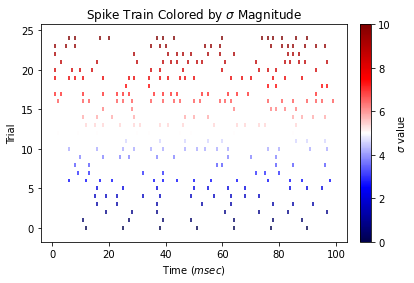

In [9]:
# create raster plots 
import matplotlib.cm as cm
import matplotlib.colors as colors


fig, ax = plt.subplots()
sigma_range = np.linspace(0,10,25) 
norm = colors.Normalize(vmin=sigma_range.min(), vmax=sigma_range.max())
# Create a colormap
cmap = cm.seismic


for i, sig in enumerate(sigma_range): 
    
    color = cmap(norm(sig))
    
    v_vals = spiking_with_noise(sigma=sig)
    plt.eventplot(np.where(v_vals==V_max), lineoffsets=i,linelengths=0.5,color=color)
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('$\sigma$ value')

# Set labels and show plot
plt.xlabel('Time $(msec)$')
plt.ylabel('Trial')
plt.title('Spike Train Colored by $\sigma$ Magnitude')
plt.savefig("Figures/spike_train_noisy.png")
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


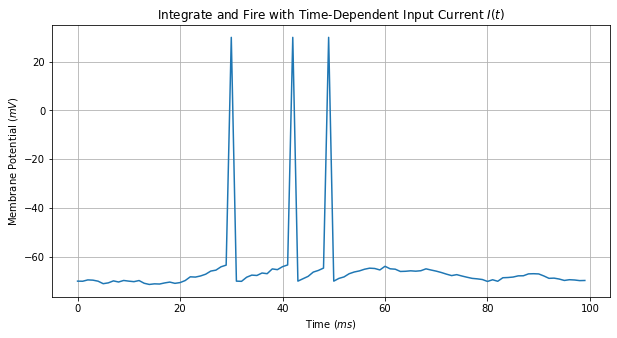

In [10]:
#1.7 Time-varying Input 

#create a function for the spiking with noise 
def spiking_with_noise(V_0=-70,dt=1,V_threshold = -63, V_max=30,
                          C=1,gL=0.1,EL=-70,I=None,T=100,sigma=0.5): 

    #in case no I was passed 
    if I is None: 
        I = np.ones(int(T/dt)) 
        
    #initialize V_values array 
    V_values = np.zeros(int(T/dt)); V_values[0]=V_0 
        
    #Euler Steppin! 
    for i in range(1,int(T/dt)):
        
        #reset if you just spiked
        if V_values[i-1] == V_max: 
            V_values[i] = EL
        
        #else integrate as usual....
        else:
            dV =  (gL*(EL-V_values[i-1])+I[i])/C
            noise = sigma*np.sqrt(dt)*np.random.normal(0,1) 
            V_values[i] = V_values[i-1]+dV*dt +noise
            
            # but spike if you get too big!!
            if V_values[i] > V_threshold: 
                V_values[i] = V_max 
        
    return V_values

#run simulation for given initial conditions 
I_vals = np.zeros(100); I_vals[20:61]=1 
print(I_vals)
V_values = spiking_with_noise(I=I_vals) 

#plot 
plt.figure(figsize=(10,5));plt.plot(V_values) 
plt.xlabel("Time ($ms$)"); plt.ylabel("Membrane Potential ($mV$)"); plt.title("Integrate and Fire with Time-Dependent Input Current $I(t)$")
plt.grid()
plt.savefig("Figures/impulse.png")




#1.7 TODO I think just give a strong injection with same probablility 

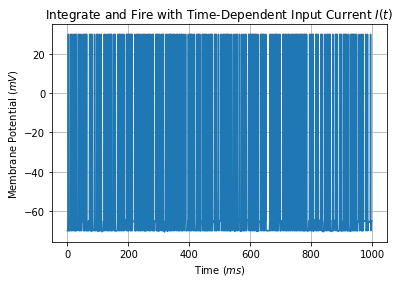

In [11]:
#1.7 Extra point: 
np.random.seed(10)
#generate correct I(t) 
T = 100 #in msec 
dt = 0.1 
num_steps = T/dt 
Hz = 250 
p_val = 1/2 #to mimic firing at given Hz  
I_t = 50*np.random.binomial(n=1, p = p_val, size = int(num_steps)) #current 

V_values = spiking_with_noise(I=I_t,dt=dt)

plt.plot(V_values) 
plt.xlabel("Time ($ms$)"); plt.ylabel("Membrane Potential ($mV$)"); plt.title("Integrate and Fire with Time-Dependent Input Current $I(t)$")
plt.grid()
plt.savefig("Figures/mimic.png")

200.0

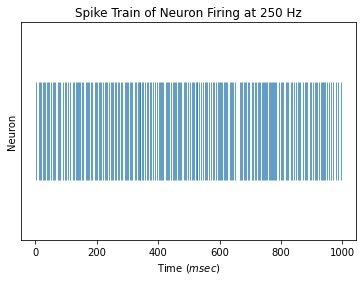

In [12]:
#frequencies to try
f_vals = [8.4,12,15.7,19.6,23.6,25.9,27.7,36]


plt.eventplot(np.where(V_values==30),linewidth=0.7)
plt.yticks([])
plt.title("Spike Train of Neuron Firing at 250 Hz")
plt.ylabel('Neuron') 
plt.xlabel("Time ($msec$)") 
plt.savefig("Figures/One_Neuron_Mimic.png")

np.sum(V_values[np.where(V_values==30)])/30

# 2 Hodgkin Huxley Model 

In [13]:
# 2 Preamble 

#gating variable functions 
def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))

def beta_n(V):
    return 0.125 * np.exp(-0.0125 * (V + 65))

def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))

def beta_m(V):
    return 4 * np.exp(-0.0556 * (V + 65))

def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65))

def beta_h(V):
    return 1 / (1 + np.exp(-0.1 * (V + 35)))


#functions to compute instant. derivative of gating vars 
def d_n(V,n): 
    return alpha_n(V)*(1-n)-beta_n(V)*n

def d_m(V,m): 
    return alpha_m(V)*(1-m)-beta_m(V)*m

def d_h(V,h): 
    return alpha_h(V)*(1-h)-beta_h(V)*h


    

In [14]:
#2.1 Simulate Hodgkin-Huxley 

def hodgkin_stepper(V_0=-70,dt=0.1, T=100, C=1, gL=0.3,EL = -54.4, gK=36,
                   EK= -77, gNa= 120, ENa = 50,I=1): 
    
    #calculate number of steps 
    num_steps = int(T/dt); V_0 = EL
    
    #initialize V_values array
    V_values = np.zeros(num_steps); V_values[0]= EL
    
    #initialize n-array
    n_values = np.zeros(num_steps)
    n_values[0]= alpha_n(V_0)/(alpha_n(V_0)+beta_n(V_0))
    
    #initialize m-array
    m_values = np.zeros(num_steps)
    m_values[0]= alpha_m(V_0)/(alpha_m(V_0)+beta_m(V_0))
    
    #initialize h-array   
    h_values = np.zeros(num_steps)
    h_values[0]= alpha_h(V_0)/(alpha_h(V_0)+beta_h(V_0))
    
    #start steppin! 
    for i in range(1,num_steps):
        
        #update gatting variables 
        n_values[i] = n_values[i-1] + d_n(V_values[i-1],n_values[i-1])*dt 
        m_values[i] = m_values[i-1] + d_m(V_values[i-1],m_values[i-1])*dt 
        h_values[i] = h_values[i-1] + d_h(V_values[i-1],h_values[i-1])*dt 

        #update voltage 
        d_V = gL*(EL - V_values[i-1]) +\
              gK * n_values[i-1]**4 * (EK - V_values[i-1]) +\
              gNa * h_values[i-1] * m_values[i-1]**3 * (ENa - V_values[i-1]) +\
              I

        V_values[i] = V_values[i-1] + d_V*dt 
        

    return V_values,n_values,m_values,h_values

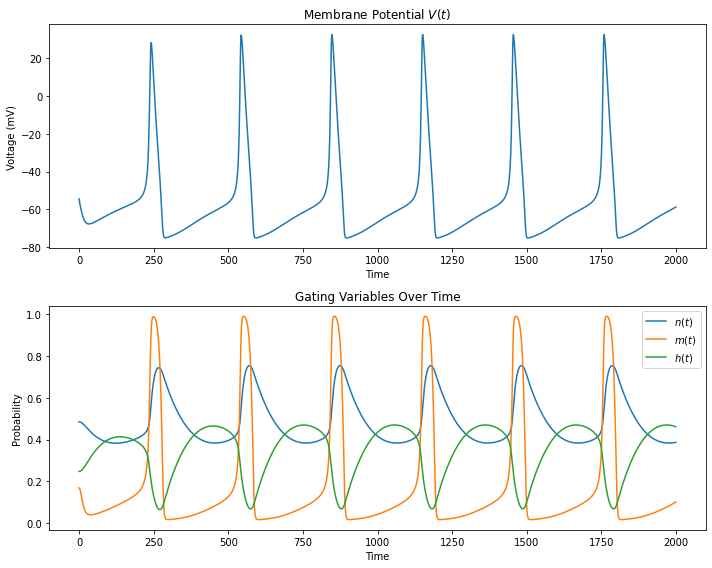

In [15]:
#2.1 
#get values
V_values, n_values, m_values, h_values = hodgkin_stepper(I=9,dt=0.05)

# create subplot 
fig, axs = plt.subplots(2, 1, figsize=(10, 8))


# Plot V_values on the first subplot
axs[0].plot(V_values)
axs[0].set_title('Membrane Potential $V(t)$')
axs[0].set_ylabel('Voltage (mV)')
axs[0].set_xlabel('Time')

# Plot n_values, m_values, h_values on the second subplot
axs[1].plot(n_values, label="$n(t)$")
axs[1].plot(m_values, label="$m(t)$")
axs[1].plot(h_values, label="$h(t)$")
axs[1].legend()
axs[1].set_title('Gating Variables Over Time')
axs[1].set_ylabel('Probability')
axs[1].set_xlabel('Time')
plt.tight_layout()

plt.savefig("Figures/2_1.png")

In [16]:
#1.5 cont 
#Bisection Method To Find I 
I_right = 10 #initial guess 
I_left = 0 

while abs(I_right-I_left) > 1e-10: 
    
    guess = (I_right+I_left)/2
    spikes = np.sum(np.where(hodgkin_stepper(I=guess,dt=0.05)[0]>20)) 
    
    if spikes != 0: 
        I_right = (I_right+I_left)/2 
    else: 
        I_left = (I_right+I_left)/2 
    
    
print(I_right,I_left) 

7.946269981621299 7.946269981548539


7.9


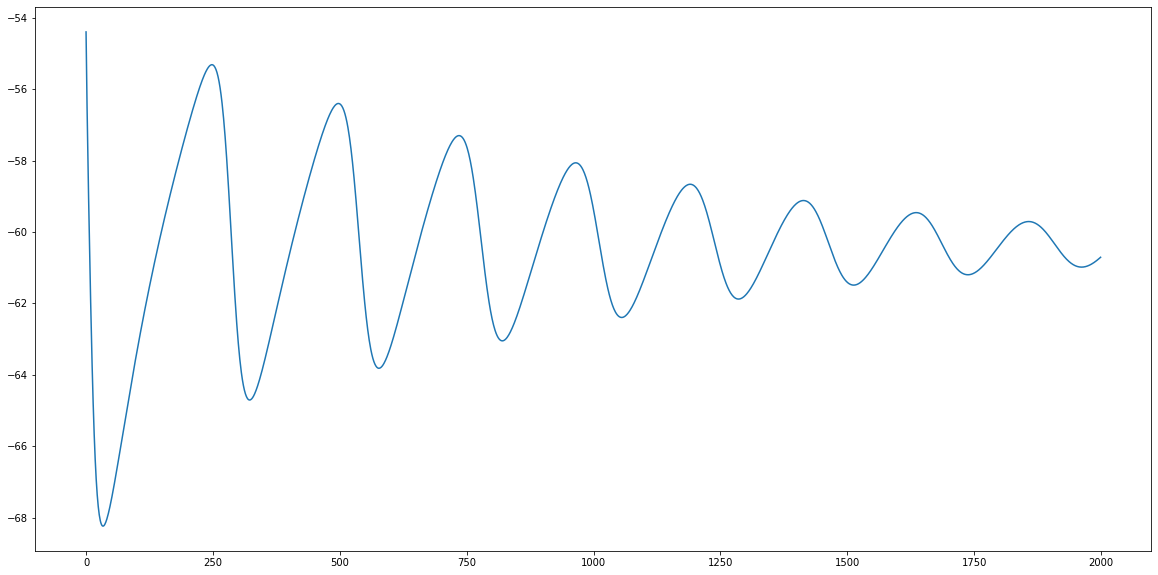

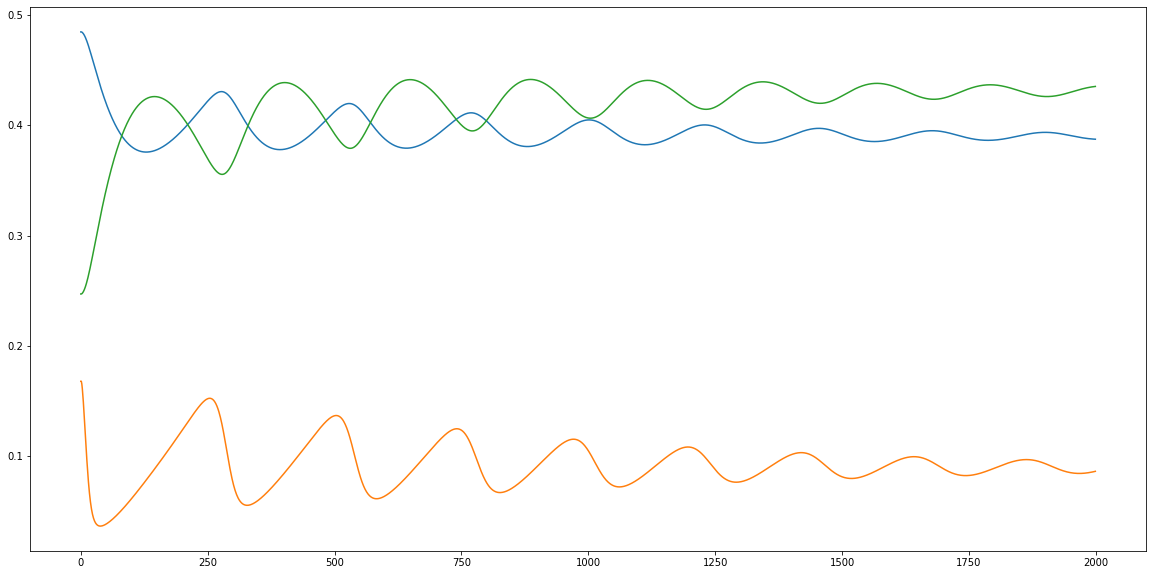





8.0


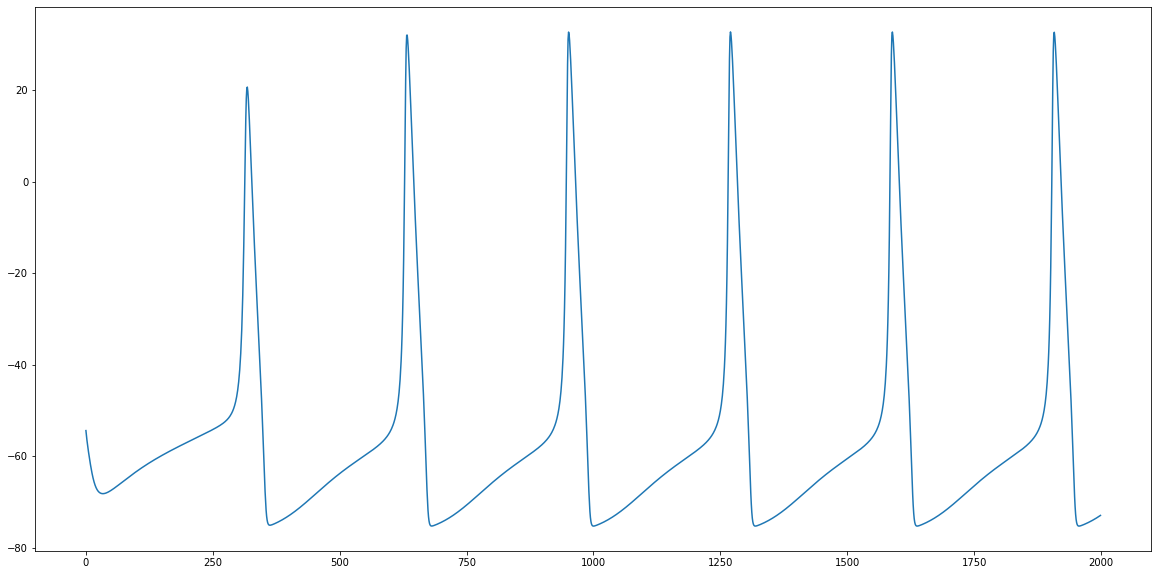

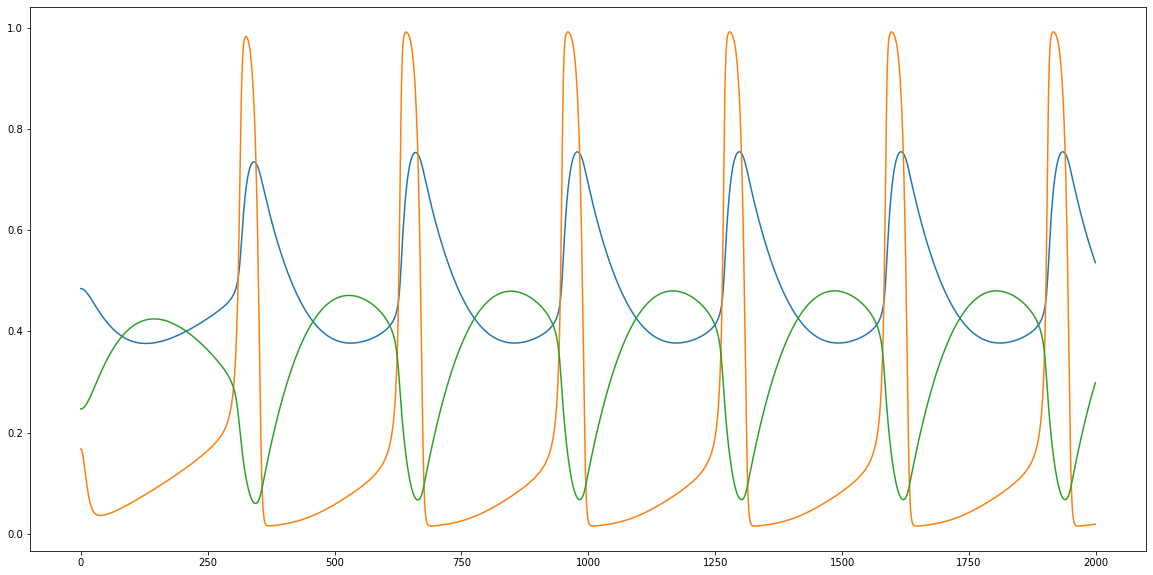





8.100000000000001


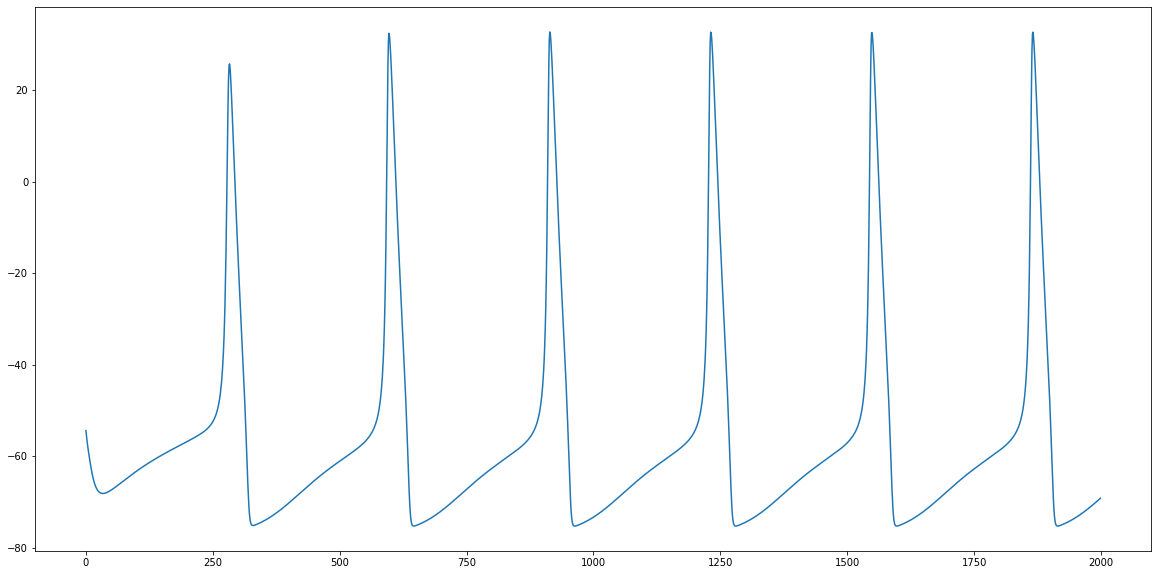

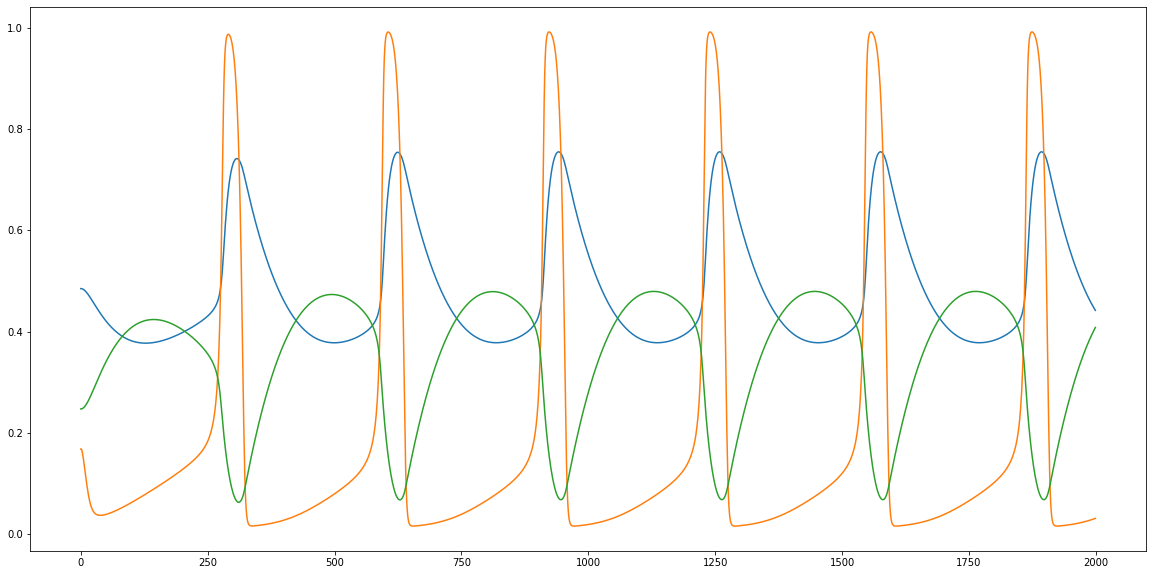





8.200000000000001


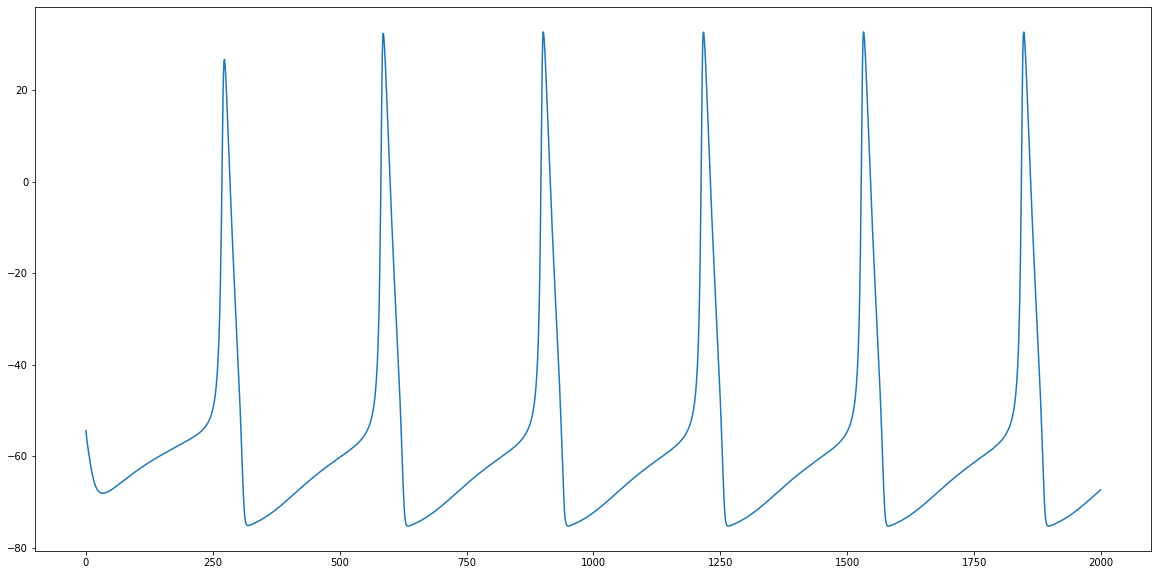

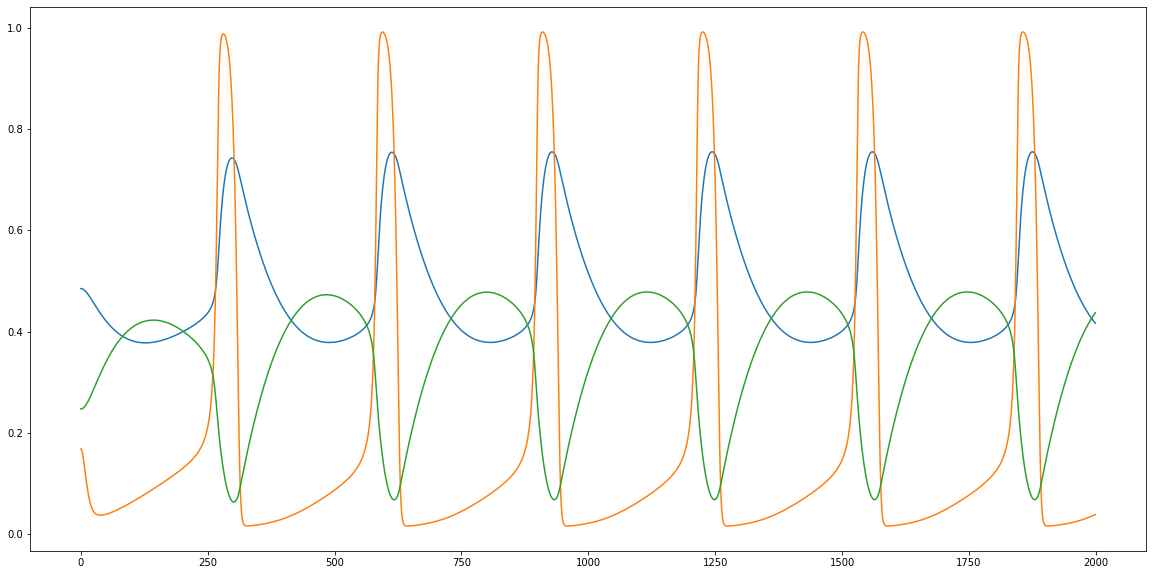





8.3


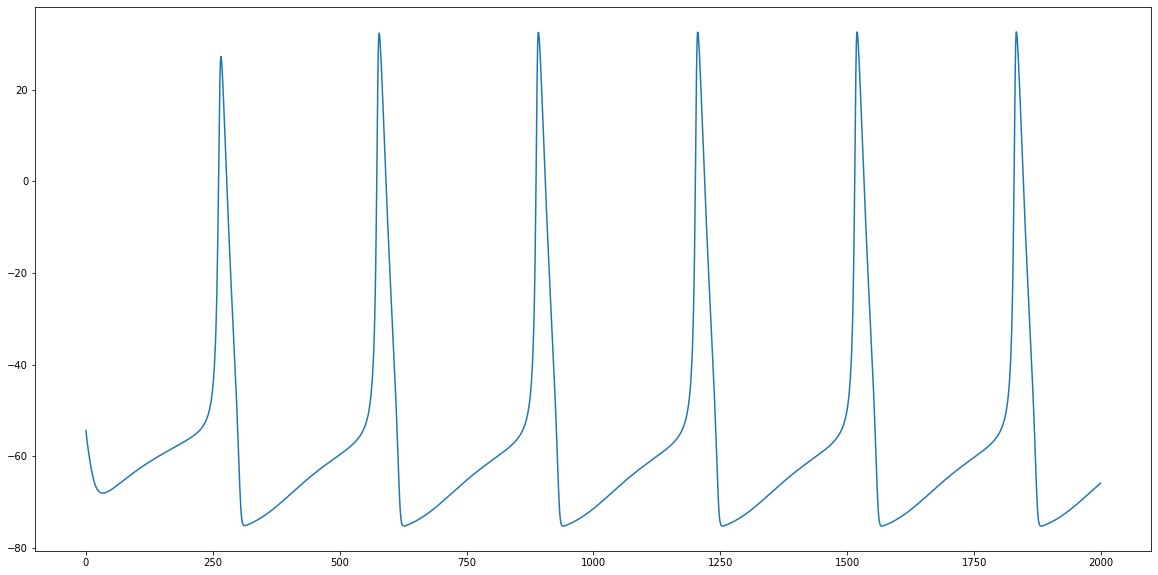

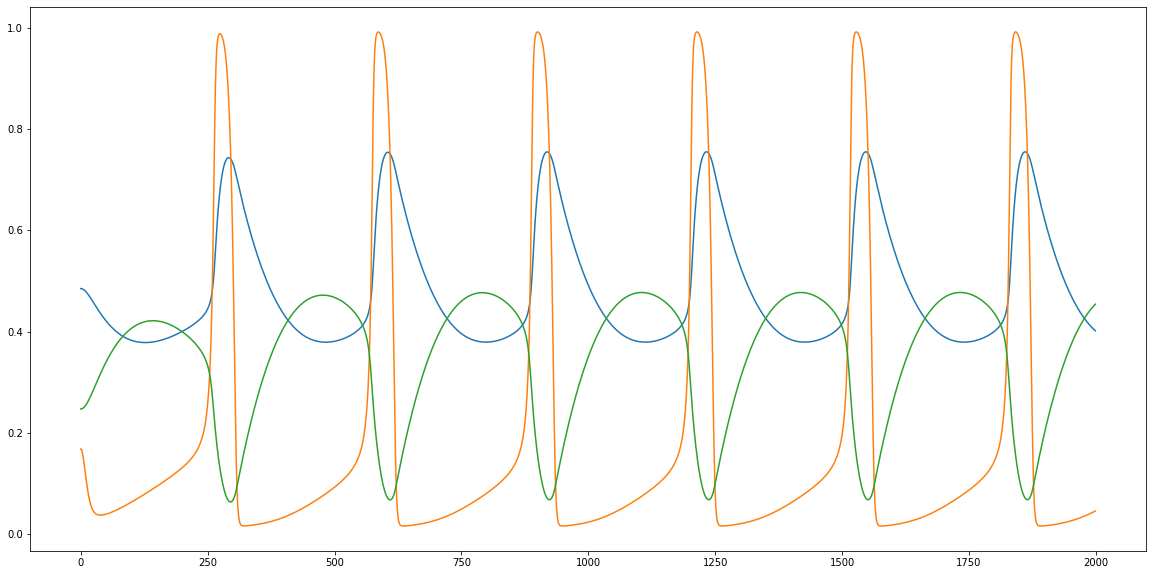

In [18]:
#run simulation for given initial conditions 

for I_val in np.linspace(7.9,8.3,5):
    V_values,n_values,m_values,h_values = hodgkin_stepper(I=I_val,dt=0.05) 

    print(I_val) 
    plt.figure(figsize=(20,10))
    plt.plot(V_values);plt.show()
    plt.figure(figsize=(20,10));
    plt.plot(n_values)
    plt.plot(m_values)
    plt.plot(h_values)
    plt.show()
    print("\n\n\n")